In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

## load dataset boston

In [3]:
boston = load_boston()
x = boston['data']
y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(x, columns=cols)
df['Price'] = y

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## checking skewnes score for each columns

In [5]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
Price      1.108098
dtype: float64

## visualizing CRIM distribution

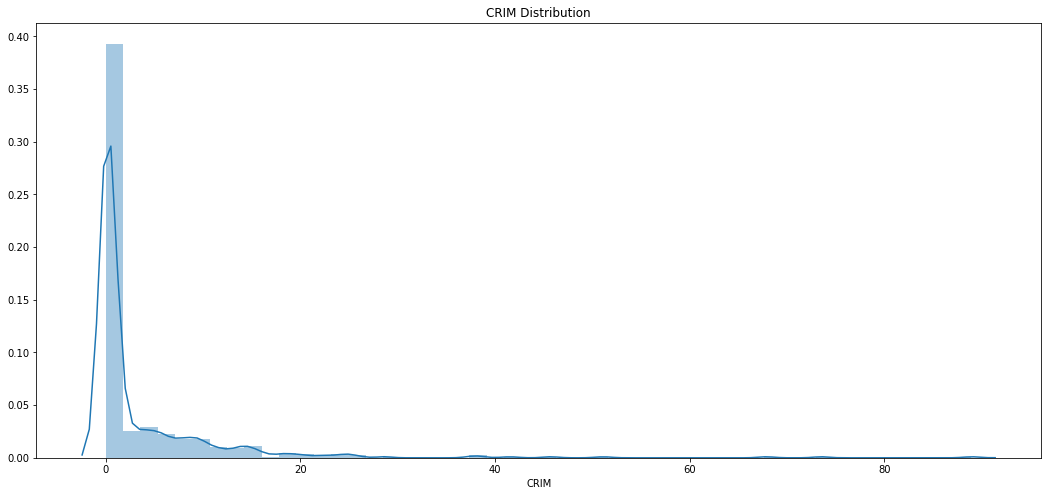

In [7]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.distplot(df['CRIM'])
plt.title('CRIM Distribution')
plt.show()

## 1. Log Transform

In [8]:
crim_log = np.log(df['CRIM'])
crim_log.skew()

0.4059344988496048

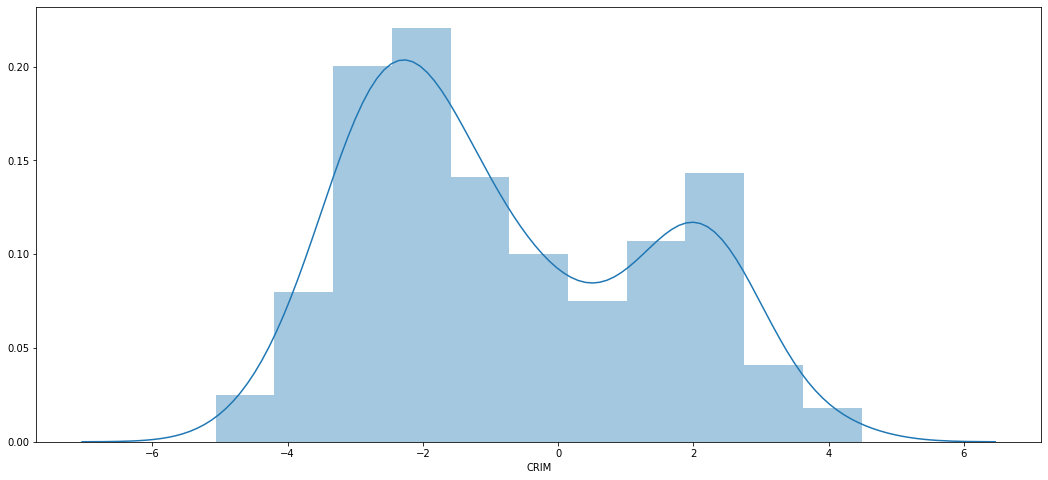

In [9]:
sns.distplot(crim_log)
plt.show()

## 2.  Square root transform

In [10]:
crim_sqrt = np.sqrt(df['CRIM'])
crim_sqrt.skew()

2.024382103123676

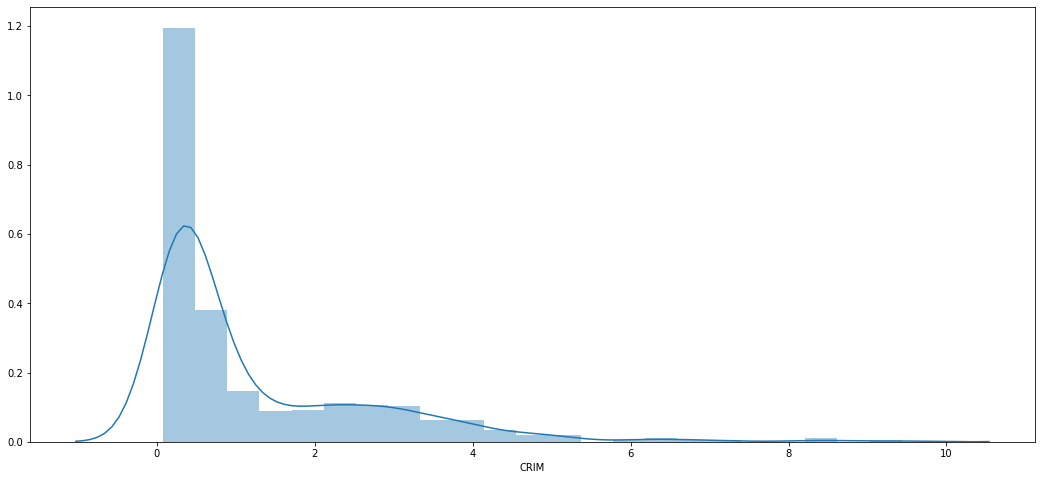

In [11]:
sns.distplot(crim_sqrt)
plt.show()

## 3. Box-Cox Transform

In [12]:
from scipy import stats

crim_boxcox = stats.boxcox(df['CRIM'])[0]
pd.Series(crim_boxcox).skew()

0.09364917268984103

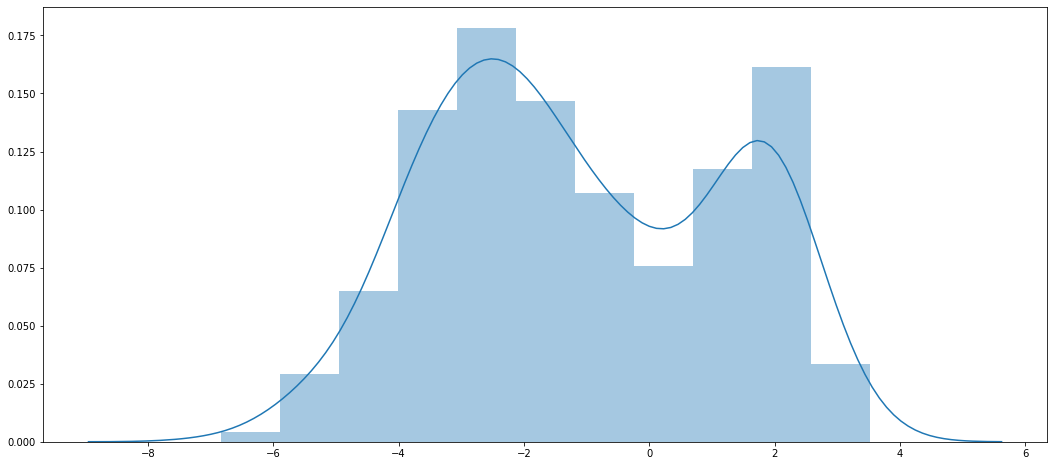

In [13]:
sns.distplot(crim_boxcox)
plt.show()